# Machine Learning Engineer Nanodegree

## Capstone Project

Arshad Khurshid
Date: Nov 4, 2017

## Project: Using Supervised Learning to identify attrition in company

A company invest lot on employee to train them and make them ready for next generation business. Once you invest in skill enhancement of an employee you need to used it for benefit of business. Employee may be agitated even if they are being paid well as human have aspiration and if aspiration is fulfilled then they perform to their maximum capability. I was looking for dataset which has features that can be reason for employee to quit and Kaggle gave me one. Retaining an employee means retaining knowledge and they are the one who grooms the people working in one level down thus helping to increase and knowledge base for all.

## Exploring Data

In this section we will import data into dataframes and explore all the attributes of the data.

In [1]:
#Importing Libraries and display the records
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("HR_comma_sep.csv")

# Success - Display the first record
display(data.head(n=5))


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Implementation: Data Exploration

We will investigate total number of records in dataset. Number ofemployee left comapny. Number of employee stayed in company.
Percentage of employee left the company. Is there any null column.

In [2]:
# Number of records in dataset
nbr_records = len(data)

# Number of records who left the company
nbr_of_emply_lft = len(data[data.left == 1])

# Number of records who are still working
nbr_of_emply_wrkng = len(data[data.left == 0])

# Percentage who left the company
prcnt_emply_lft = float(nbr_of_emply_lft* 100)/nbr_records

# Check null values in dataset
null_count = data.isnull().values.ravel().sum()

# Print the results
print ("Total number of records: {}" .format(nbr_records))

print ("Total number of employee who have moved on: {}" .format(nbr_of_emply_lft))
print ("Total number of employee who have stayed: {}" .format(nbr_of_emply_wrkng))
print ("Percent of employee who have moved on: {:.2f}%" .format(prcnt_emply_lft))
print ("Total number of null rows in Dataframe: {}" .format(null_count))
print ("\n Datatype as below")
print (data.dtypes)

Total number of records: 14999
Total number of employee who have moved on: 3571
Total number of employee who have stayed: 11428
Percent of employee who have moved on: 23.81%
Total number of null rows in Dataframe: 0

 Datatype as below
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


### Features and description

satisfaction_level : Level of Satisfaction
last_evaluation :Time since Last performance Evaluation
number_project :Number of Project completed while at work
average_montly_hours : Average monthly hours at workplace
time_spend_company : Number of years spent in the company
Work_accident : Whether the employee had a workplace accident
left : Whether employee left the workplace or not
promotion_last_5years: Wehter employee was promoted in last 5 years
sales : Department they work for
Salary : Relative level of Salary(high)

Text(0.5,1,'Heatmap of Correlation Matrix')

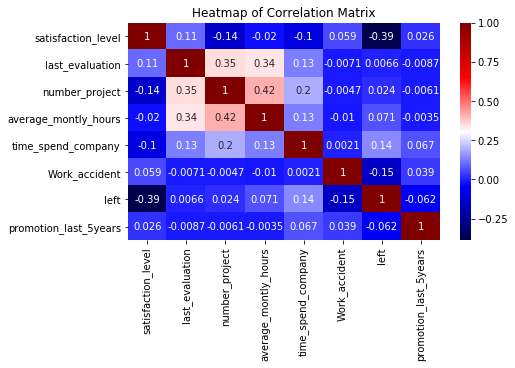

In [3]:
# Split data into features and target
import matplotlib.pyplot as plt

left_raw = data['left']
features_raw = data.drop('left', axis = 1)

# Visualize skewed continuous features of original data
import seaborn as sns

fig = plt.figure(figsize=(7,4))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')



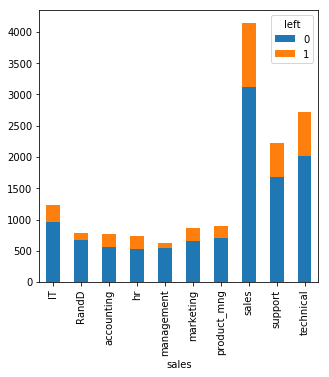

In [4]:
# Stack bar graph

stack_bar_graph = pd.crosstab(index=data["sales"], 
                          columns=data["left"])

stack_bar_graph.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
features_log_transformed = pd.DataFrame(data = features_raw)
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,sales,low


Text(0.5,1,'Heatmap of Correlation Matrix after Lograthmic Scaling')

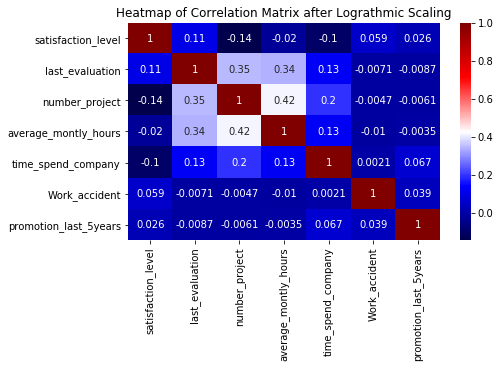

In [6]:
fig = plt.figure(figsize=(7,4))
corr = features_log_minmax_transform.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix after Lograthmic Scaling')

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
left = pd.get_dummies(left_raw, drop_first = True)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print (encoded)



20 total features after one-hot encoding.


#### Shuffle and Split data

As all the categorical column has been converted to numerical column and all numerical column has been scaled. In the below section will will split data (both features and label) into training and test sets. 80% will be used for training and 20% will be used for test. 

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    left, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 11999 samples.
Testing set has 3000 samples.


### Benchmark Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


BM_Classifier = LogisticRegression()
BM_Classifier.fit(X_train, y_train,)

BM_Predict = BM_Classifier.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, BM_Predict).ravel()
BM_accuracy = accuracy_score(y_test, BM_Predict)
BM_fbeta = fbeta_score(y_test, BM_Predict, beta=0.5)

#print(tn, fp, fn, tp)
print("Confusion matrix has {} True Negative " .format(tn))
print("Confusion matrix has {} False Positive " .format(fp))
print("Confusion matrix has {} False Negative " .format(fn))
print("Confusion matrix has {} True Positive " .format(tp))
print("Logistic regression model has {:.3f} accuracy" .format(BM_accuracy))
print("Logistic regression model has {:.3f} accuracy" .format(BM_fbeta))

Confusion matrix has 2134 True Negative 
Confusion matrix has 165 False Positive 
Confusion matrix has 474 False Negative 
Confusion matrix has 227 True Positive 
Logistic regression model has 0.787 accuracy
Logistic regression model has 0.500 accuracy


C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


EAB_Classifier = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=0)
EAB_Classifier.fit(X_train, y_train,)

EAB_Predict = EAB_Classifier.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, EAB_Predict).ravel()
EAB_accuracy = accuracy_score(y_test, EAB_Predict)
EAB_fbeta = fbeta_score(y_test, EAB_Predict, beta=0.5)

#print(tn, fp, fn, tp)
print("Confusion matrix has {} True Negative " .format(tn))
print("Confusion matrix has {} False Positive " .format(fp))
print("Confusion matrix has {} False Negative " .format(fn))
print("Confusion matrix has {} True Positive " .format(tp))
print("AdaBoostClassifier model has {:.3f} accuracy" .format(EAB_accuracy))
print("AdaBoostClassifier model has {:.3f} fbeta" .format(EAB_fbeta))

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix has 2247 True Negative 
Confusion matrix has 52 False Positive 
Confusion matrix has 59 False Negative 
Confusion matrix has 642 True Positive 
AdaBoostClassifier model has 0.963 accuracy
AdaBoostClassifier model has 0.923 fbeta


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


GBC_Classifier = GradientBoostingClassifier(random_state=0)
GBC_Classifier.fit(X_train, y_train,)

GBC_Predict = GBC_Classifier.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, GBC_Predict).ravel()
GBC_accuracy = accuracy_score(y_test, GBC_Predict)
GBC_fbeta = fbeta_score(y_test, GBC_Predict, beta=0.5)

#print(tn, fp, fn, tp)
print("Confusion matrix has {} True Negative " .format(tn))
print("Confusion matrix has {} False Positive " .format(fp))
print("Confusion matrix has {} False Negative " .format(fn))
print("Confusion matrix has {} True Positive " .format(tp))
print("Gradient Boosting Classifier model has {:.3f} accuracy" .format(GBC_accuracy))
print("Gradient Boosting Classifier model has {:.3f} fbeta" .format(GBC_fbeta))

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix has 2279 True Negative 
Confusion matrix has 20 False Positive 
Confusion matrix has 45 False Negative 
Confusion matrix has 656 True Positive 
Gradient Boosting Classifier model has 0.978 accuracy
Gradient Boosting Classifier model has 0.963 fbeta
